**<h1> COMPARISON BETWEEN PANDAS AND KOALAS LIBRARY ON HEALTH INSURANCE MARKETPLACE DATASET 🏥<h1>**


---



**Group Members:**

<table width = 700>
  <tr>
    <th>Name</th>
    <th>Matric</th>
  </tr>
  <tr>
    <th>AHMAD MUHAIMIN BIN AHMAD HAMBALI</th>
    <th>A20EC0006</th>
  </tr>
  <tr>
    <th>NAYLI NABIHAH BINTI JASNI</th>
    <th>A20EC0105</th>
  </tr>
    <tr>
    <th>SAKINAH AL’IZZAH BINTI MOHD ASRI</th>
    <th>A20EC0142</th>
  </tr>
    <tr>
    <th>LEE JIA XIAN</th>
    <th>A20EC0200</th>
  </tr>
</table> 

#### Install all the needed libraries

In [ ]:
!pip install koalas
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Import all related libraries

In [ ]:
import pandas as pd
import numpy as np
import databricks.koalas as ks
from pyspark.sql import SparkSession

#### Read the dataset

In [ ]:
# Read dataset from google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/1vjPUP6g8ps0qNWQgybAEUrMULMwprsjy/view?usp=sharing'
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Rate_koalas.csv') 

**<h3> COMPARISON BETWEEN KOALAS AND PANDAS </h3>**


Pandas is an open-source data analysis and manipulation tool built on top of the Python programming language that is fast, powerful, flexible, and simple to use.

The Koalas project makes data scientists more productive when interacting with big data by implementing the pandas DataFrame API on top of Apache Spark.

The comparison of koalas and pandas is done to determine which libraries are more effiecient to use in health insurance marketplace dataset.

**<h4> COMPARISON BETWEEN READ CSV <h4>**

In [ ]:
%time kdf = ks.read_csv('Rate_koalas.csv')

CPU times: user 576 ms, sys: 197 ms, total: 774 ms
Wall time: 1min 23s


In [ ]:
%time df = pd.read_csv('Rate_koalas.csv')

CPU times: user 36 s, sys: 6.21 s, total: 42.2 s
Wall time: 46.3 s


Pandas complete the file in **46.3 seconds**, while koalas take **1 minute and 23 seconds**. Pandas run faster than koalas due to the fact that the dataset used fits within a single node. However, koalas outperform pandas better when execute the file by depending on other things that were keeping the computer busy. Based on CPU times, koalas completed the file execution in miliseconds as compared to seconds for pandas.



**<h4> COMPARISON BETWEEN MEAN FROM ONE COLUMN<h4>**

In [ ]:
%time kdf["Couple"].mean()

CPU times: user 152 ms, sys: 20.2 ms, total: 172 ms
Wall time: 21.7 s


48.115714320607594

In [ ]:
%time df["Couple"].mean()

CPU times: user 97.5 ms, sys: 9.07 ms, total: 107 ms
Wall time: 107 ms


48.11571432060767

Pandas are faster than Koalas at executing the mean value from the "Couple" column. The mean value from koalas, on the other hand, is more precise because it has more digits to the right of the decimal point.



**<h4> COMPARISON OF BAR CHART <h4>**

In [ ]:
%time kdf['RatingAreaId'].value_counts().plot.bar()

CPU times: user 1.06 s, sys: 216 ms, total: 1.28 s
Wall time: 25.6 s


CPU times: user 1.17 s, sys: 13.6 ms, total: 1.19 s
Wall time: 1.21 s


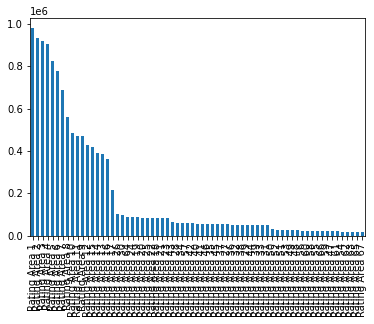

In [ ]:
%time df['RatingAreaId'].value_counts().plot(kind = 'bar')

The bar chart access the Rating Area ID by calling the value_counts method to get a count of unique values, then call the plot method and pass in bar.The resulting object will be in descending order so that the first element is the most frequently-occurring element. Koalas can generate a complete bar chart with x-axis and y-axis value labels, as well as an indicator and tooltip on the bar. However, pandas cannot produce a good bar chat if the values are large without specifying the figsize.

**<h4>COMPARISON BETWEEN COUNTING OF NULL VALUE </h4>**

In [ ]:
%time kdf.isnull().sum()

CPU times: user 946 ms, sys: 127 ms, total: 1.07 s
Wall time: 57.5 s


BusinessYear                                        0
StateCode                                           0
IssuerId                                            0
SourceName                                          0
VersionNum                                          0
ImportDate                                          0
IssuerId2                                           0
FederalTIN                                          0
RateEffectiveDate                                   0
RateExpirationDate                                  0
PlanId                                              0
RatingAreaId                                        0
Tobacco                                             0
Age                                                 0
IndividualRate                                      0
IndividualTobaccoRate                         7762096
Couple                                       12653504
PrimarySubscriberAndOneDependent             12653504
PrimarySubscriberAndTwoDepen

In [ ]:
%time df.isnull().sum()

CPU times: user 6.88 s, sys: 808 ms, total: 7.69 s
Wall time: 7.67 s


BusinessYear                                        0
StateCode                                           0
IssuerId                                            0
SourceName                                          0
VersionNum                                          0
ImportDate                                          0
IssuerId2                                           0
FederalTIN                                          0
RateEffectiveDate                                   0
RateExpirationDate                                  0
PlanId                                              0
RatingAreaId                                        0
Tobacco                                             0
Age                                                 0
IndividualRate                                      0
IndividualTobaccoRate                         7762096
Couple                                       12653504
PrimarySubscriberAndOneDependent             12653504
PrimarySubscriberAndTwoDepen

Both Python libraries produce the same result, with Koala's CPU time seeming to be quick than Panda's. However, pandas have much faster wall times than koalas.

**<h4>COMPARISON BETWEEN CALCULATION OF NUMERICAL DATA</h4>**

In [ ]:
%time kdf.describe()

CPU times: user 1.12 s, sys: 155 ms, total: 1.28 s
Wall time: 2min 15s


,BusinessYear,IssuerId,VersionNum,IssuerId2,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
count,1.269444e+07,1.269444e+07,1.269444e+07,1.269444e+07,1.269444e+07,4.932349e+06,40941.000000,40941.000000,40941.000000,40941.000000,40941.000000,40941.000000,40941.000000,1.269444e+07
mean,2.015034e+03,5.248592e+04,6.865558e+00,5.248592e+04,4.098026e+03,5.436911e+02,48.115714,49.835901,70.660012,89.405494,72.782793,89.012859,107.807774,6.348572e+03
std,7.940521e-01,2.641263e+04,3.857180e+00,2.641263e+04,6.122271e+04,2.945916e+02,30.422891,29.691985,44.620130,57.699279,48.232537,59.139094,73.241174,9.011435e+03
min,2.014000e+03,1.004600e+04,1.000000e+00,1.004600e+04,0.000000e+00,4.173000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000e+01
25%,2.014000e+03,3.021900e+04,4.000000e+00,3.021900e+04,2.933000e+01,3.391100e+02,26.710000,27.390000,27.910000,29.410000,28.260000,28.260000,29.490000,8.730000e+02
50%,2.015000e+03,4.953200e+04,6.000000e+00,4.953200e+04,2.915900e+02,4.632900e+02,49.750000,51.240000,74.680000,98.800000,77.260000,97.890000,116.690000,2.728000e+03
75%,2.016000e+03,7.652600e+04,9.000000e+00,7.652600e+04,4.789400e+02,6.843800e+02,69.900000,72.230000,107.670000,137.080000,110.420000,136.320000,167.960000,7.575000e+03
max,2.016000e+03,9.996900e+04,2.400000e+01,9.996900e+04,9.999990e+05,6.604610e+03,182.400000,169.650000,251.740000,357.940000,260.850000,339.310000,449.140000,6.349300e+04


In [ ]:
%time df.describe()

CPU times: user 8.42 s, sys: 2.65 s, total: 11.1 s
Wall time: 11.2 s


,BusinessYear,IssuerId,VersionNum,IssuerId2,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
count,1.269444e+07,1.269444e+07,1.269444e+07,1.269444e+07,1.269444e+07,4.932349e+06,40941.000000,40941.000000,40941.000000,40941.000000,40941.000000,40941.000000,40941.000000,1.269444e+07
mean,2.015034e+03,5.248592e+04,6.865558e+00,5.248592e+04,4.098026e+03,5.436911e+02,48.115714,49.835901,70.660012,89.405494,72.782793,89.012859,107.807774,6.348572e+03
std,7.940521e-01,2.641263e+04,3.857180e+00,2.641263e+04,6.122271e+04,2.945916e+02,30.422891,29.691985,44.620130,57.699279,48.232537,59.139094,73.241174,9.011435e+03
min,2.014000e+03,1.004600e+04,1.000000e+00,1.004600e+04,0.000000e+00,4.173000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000e+01
25%,2.014000e+03,3.021900e+04,4.000000e+00,3.021900e+04,2.933000e+01,3.391200e+02,26.710000,27.390000,27.910000,29.410000,28.260000,28.260000,29.490000,8.730000e+02
50%,2.015000e+03,4.953200e+04,6.000000e+00,4.953200e+04,2.916000e+02,4.632900e+02,49.770000,51.240000,74.680000,98.800000,77.250000,97.910000,116.710000,2.728000e+03
75%,2.016000e+03,7.652600e+04,9.000000e+00,7.652600e+04,4.789800e+02,6.843900e+02,69.900000,72.230000,107.670000,137.080000,110.430000,136.330000,167.960000,7.577000e+03
max,2.016000e+03,9.996900e+04,2.400000e+01,9.996900e+04,9.999990e+05,6.604610e+03,182.400000,169.650000,251.740000,357.940000,260.850000,339.310000,449.140000,6.349300e+04


Both Python libraries produce the same result, with Koala's CPU time is faster than Panda's. However, pandas have much faster wall time than koalas.

**<h4>COMPARISON BETWEEN HISTOGRAM</h4>**

In [ ]:
k_hist = kdf['Couple'].plot.hist()
%time k_hist 

CPU times: user 0 ns, sys: 5 µs, total: 5 µs
Wall time: 10 µs


CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.44 µs


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf9fa3e340>]],
      dtype=object)

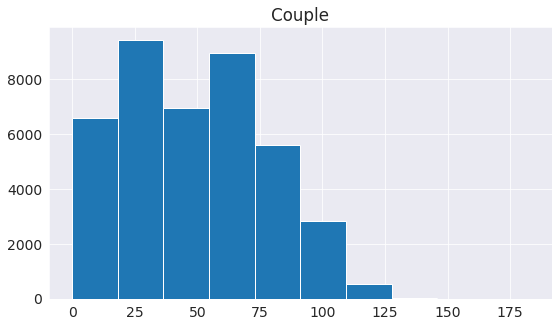

In [ ]:
hist = df.hist(column='Couple')
%time hist

The histogram access the "Couple" column, then call the plot method and pass in histogram. Koalas generate a complete histogram with x-axis and y-axis value labels, as well as a tooltip on the chart. However, pandas produce a basic histogram without labels the x-axis and y-axis. Despite the fact that koalas executes slightly slower than pandas, the histogram is much easier to analyse.